In [1]:

#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from datetime import datetime


import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


if keras.backend.backend() == 'tensorflow':
    from keras import backend as K
    import tensorflow as tf
    from keras.utils.conv_utils import convert_kernel
    
 

Using TensorFlow backend.


In [2]:
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))

W0610 19:50:46.232410  4688 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
W0610 19:50:46.263802  4688 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


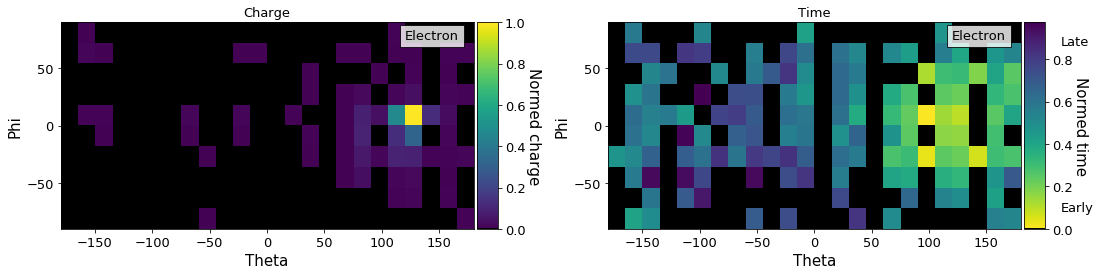

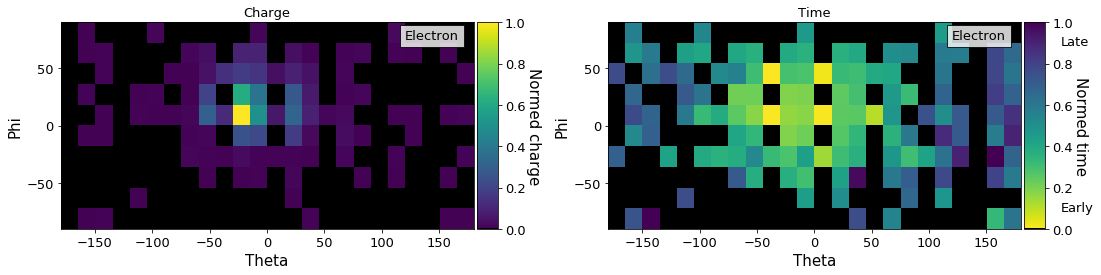

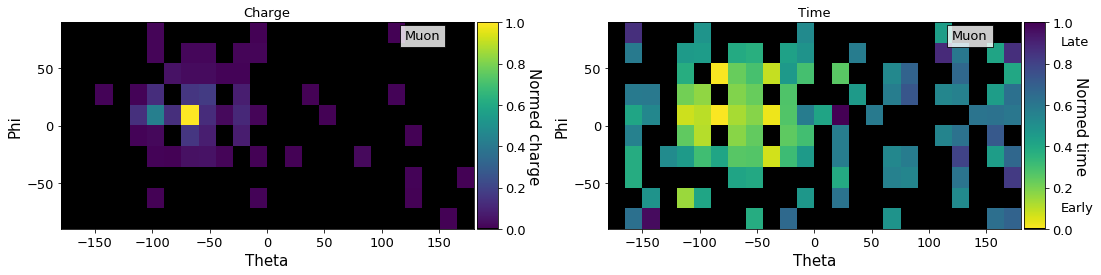

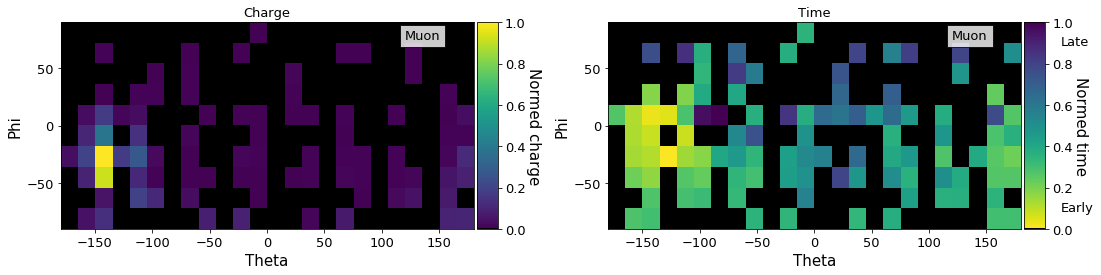

In [3]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=[200,80000]#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (Y[a] == (1,0)).all():
        Title="Electron"
        
        pass
        #print(Title)
    else:
        Title="Muon"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(X[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(X[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

In [4]:
del X,Y
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_globalnorm_PMT160andLAPPD5x5_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_globalnorm_PMT160andLAPPD5x5_120k_Files_mitTopBottom.pickle","rb"))

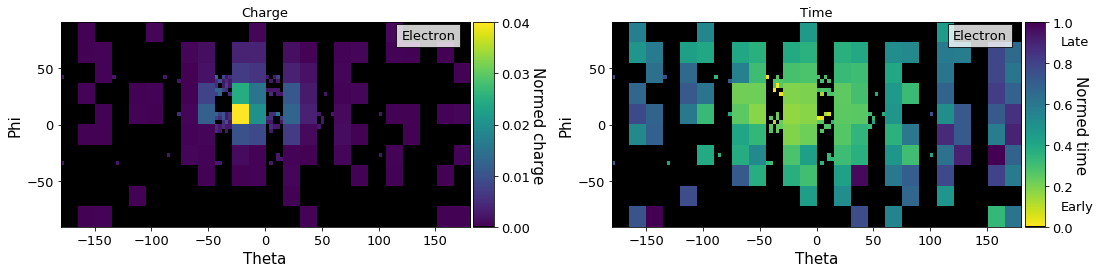

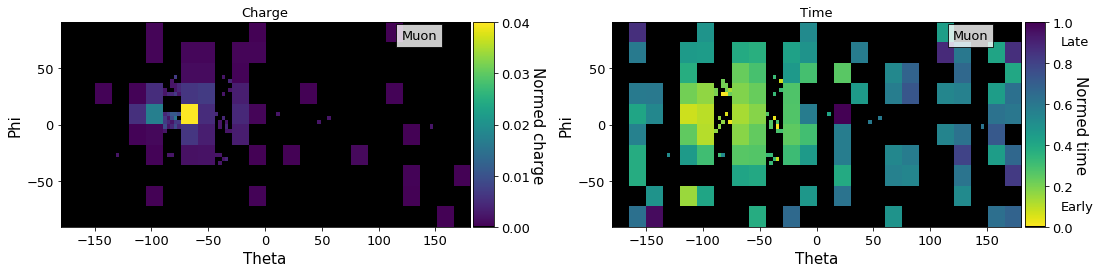

In [5]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=[200,80000]#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (Y[a] == (1,0)).all():
        Title="Electron"
        
        pass
        #print(Title)
    else:
        Title="Muon"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(X[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(X[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

In [11]:
del X,Y

In [7]:
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(1x1)_120k_Files.pickle","rb"))

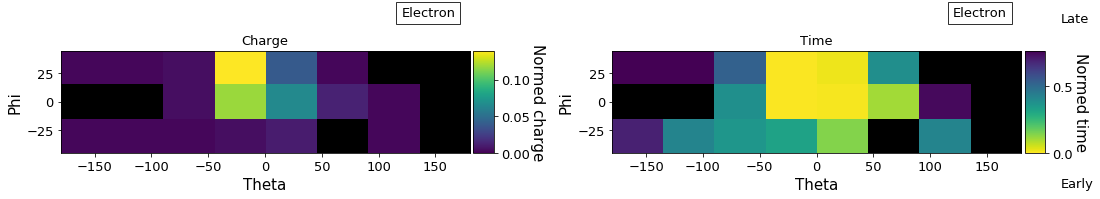

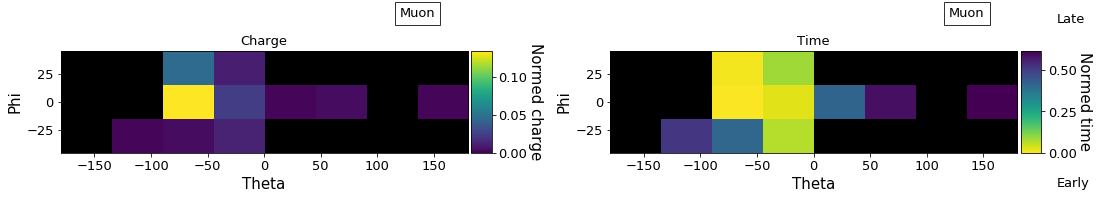

In [10]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=[200,80000]#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (Y[a] == (1,0)).all():
        Title="Electron"
        
        pass
        #print(Title)
    else:
        Title="Muon"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(X[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-45,45])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(X[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-45,45])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

In [ ]:
model = tf.keras.models.load_model("CNN_InputModel-improvement-val-acc_0.94.model")

In [11]:
del X,Y

In [12]:
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))

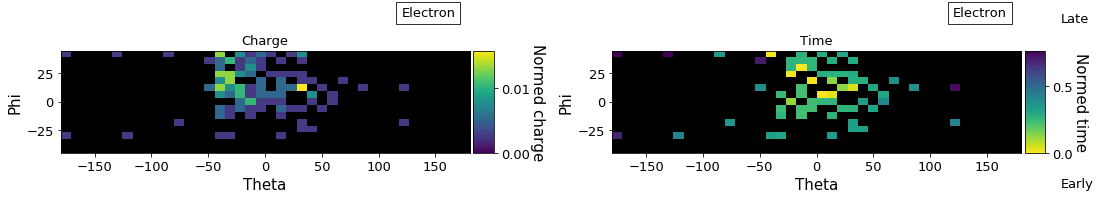

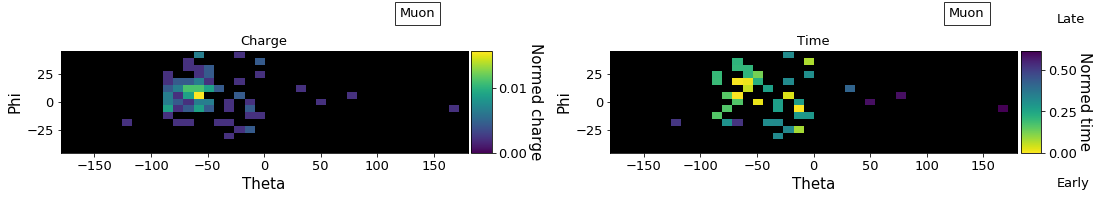

In [13]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=[200,80000]#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (Y[a] == (1,0)).all():
        Title="Electron"
        
        pass
        #print(Title)
    else:
        Title="Muon"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(X[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-45,45])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(X[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-45,45])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

In [14]:
del X,Y

In [15]:
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))

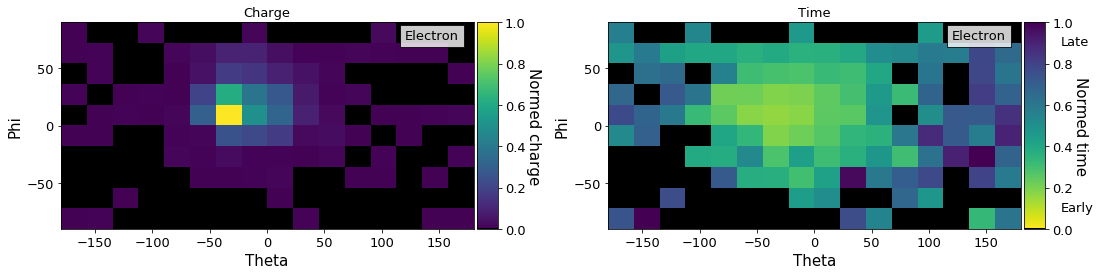

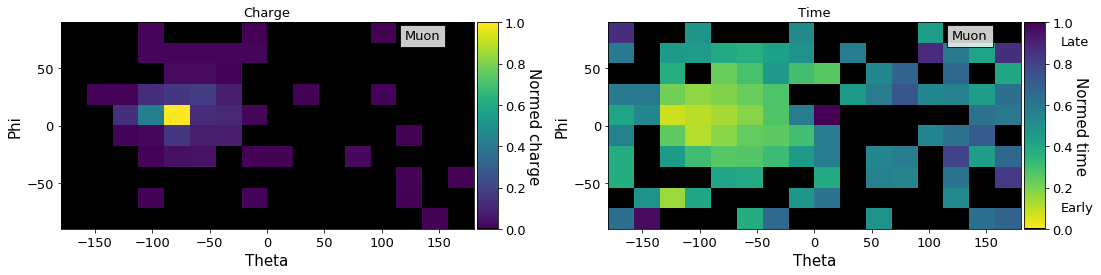

In [16]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=[200,80000]#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (Y[a] == (1,0)).all():
        Title="Electron"
        
        pass
        #print(Title)
    else:
        Title="Muon"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(X[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(X[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)